# **PROBLEM STATEMENT**

- GIVEN DATASET
      
      - YEAR OF MANUFACTURING
      - PRICE

- FIND THE LINEAR RELATIONSHIP BETWEEN YEAR AND PRICE
- PREDICT PRICE OF 2022 MODEL SECOND HAND GRAND I10
- LASSO REGRESSION
- CREATE LINEAR REGRESSION MODEL

In [ ]:
# target column ---price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **REGRESSION PROBELM**

# **STEP1: LOAD DATASET** /DATA COLLECTION

In [2]:
df = pd.read_csv('/content/car_age_price.csv')

In [3]:
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
# columns and rows
df.shape

(112, 2)

In [7]:
df.dtypes

,0
Year,int64
Price,int64


# **STEP2:DATA ANALYSIS**

In [15]:
df['Price'].value_counts()

,count
Price,
550000,20
520000,11
500000,10
450000,6
490000,5
400000,5
465000,4
300000,4
600000,4


In [8]:
df['Year'].value_counts()

,count
Year,
2017,47
2015,22
2019,12
2018,11
2016,6
2014,6
2020,4
2013,4


In [ ]:
#regression

In [9]:
df.isnull().sum()

,0
Year,0
Price,0


In [ ]:
# no null values

# **STEP 3:FEATURE ENGINEERING**

In [14]:
# check for duplicates
df.duplicated()

,0
0,False
1,False
2,False
3,True
4,True
...,...
107,False
108,False
109,False
110,False


In [16]:
# analysing the duplicates
df[df.duplicated()]

,Year,Price
3,2018,465000
4,2018,465000
9,2017,575000
15,2017,500000
16,2017,500000
18,2019,500000
19,2017,500000
20,2018,500000
21,2019,500000
23,2017,550000


In [ ]:
# repeating the same year and price, so these rows do not adding new information,
# i guess they will bias the model

In [17]:
#removing dulplicates
df = df.drop_duplicates()

In [18]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.shape

(58, 2)

In [28]:
# --- independent col --->year
# y --- dependendt co--- price (target column)
x = df[['Year']]
y = df['Price']# target col

In [ ]:
# IF X INCRESASE ,HOW MUCH DOES Y INCREASE ON AVERAGE?

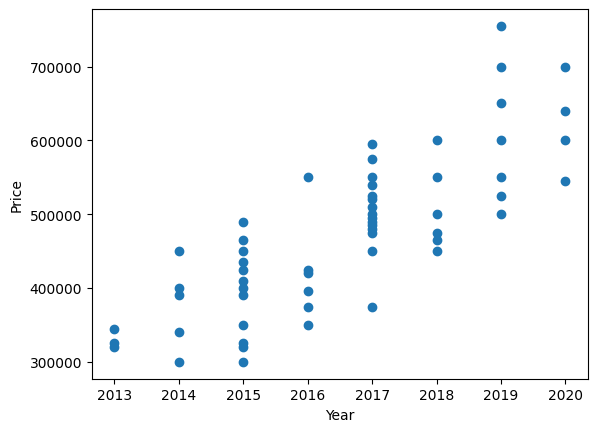

In [29]:
#visualisation
plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

price of second hand car generally increases  with the year of manufacture.
indicating the best posssible linear relationship between year and price.

# **STEP4: MODEL TRAINING**

In [ ]:
# TRAIN AND TESTING

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size= 0.2, random_state= 42)

# **STEP4: MODEL SELECTION**

**create linear regression model**

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()#
model.fit(x_train,y_train)

LinearRegression()

### **STEP 5:PREDICTION**

In [37]:
#make the prediction on our test data and store the sresults in p_pred
y_pred_model=model.predict(x_test)

### **STEP 6: EVALUATION**

In [48]:
#evaluation metrics __ mean square error and r2 score
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
model_mse = mean_squared_error(x_test, y_pred_model)

In [54]:
model_r2 = r2_score(x_test,y_pred_model)

In [55]:

print('LinearRegression mse',y_pred_model )
print('LinearRegression r2', y_pred_model)

LinearRegression mse [541975.77419354 498094.31397849 498094.31397849 410331.39354838
 366449.93333334 498094.31397849 410331.39354838 322568.47311828
 410331.39354838 498094.31397849 629738.69462365 410331.39354838]
LinearRegression r2 [541975.77419354 498094.31397849 498094.31397849 410331.39354838
 366449.93333334 498094.31397849 410331.39354838 322568.47311828
 410331.39354838 498094.31397849 629738.69462365 410331.39354838]


## **PREDICT THE PRICE FOR 2022 MODEL**

the model estimate the price based on the learned linear relationship between year and price.

In [56]:
model.predict([[2022]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([717501.61505376])

- model predicts the price approximatelty 7.76, showing that newer cars generally have higher price.

# **LASSO REGRESSION MODEL**

**LASSO REGRESSION is like regular linear regression, but with rules.its helps the model pick only the important features and ignores the less important ones, making the prediction more accurate.**

In [44]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)# reduce the effect of less important features
lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

prediction

In [45]:
y_pred_lasso = lasso.predict(x_test)

evaluation

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
lasso_mse = mean_squared_error(y_test,y_pred_lasso)


In [51]:
lasso_r2 = r2_score(y_test,y_pred_lasso)

**MODEL COMPARISON**

In [57]:
comparison = pd.DataFrame({
    'model': ['linear regression', 'Lasso regression'],
    'mse':[model_mse,lasso_mse],
    'r2': [model_r2, lasso_r2]
})
comparison

,model,mse,r2
0,linear regression,2.143679e+11,-6.286960e+10
1,Lasso regression,4.578559e+09,5.952655e-01


In [ ]:
# to see which one predicts better>
# to check model reliability
# to check decide which model is more accurate and generalizable

from model comparison ,LASSO regression performed better than LINEAR regression.
- LASSO ---a lower mean square error and a higher r2 score
- indicating better prediction accuracy and model realiability.